In [634]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [635]:
#Bring in coaches data
#Manually changed separator to pipes and removed commas from money data
coaches=pd.read_csv("C:/Users/herre/Downloads/Coaches.csv", sep="|", engine='python')
coachesDF=pd.DataFrame(coaches)
print(coachesDF)

                 ï»¿School Conference              Coach  SchoolPay  \
0    Air Force              Mt. West   Troy Calhoun       885000.0    
1    Akron                  MAC        Terry Bowden       411000.0    
2    Alabama                SEC        Nick Saban         8307000.0   
3    Alabama at Birmingham  C-USA      Bill Clark         900000.0    
4    Appalachian State      Sun Belt   Scott Satterfield  712500.0    
..                 ...           ...                 ...       ...    
124  West Virginia          Big 12     Dana Holgorsen     3605000.0   
125  Western Kentucky       C-USA      Mike Sanford Jr.   800000.0    
126  Western Michigan       MAC        Tim Lester         800000.0    
127  Wisconsin              Big Ten    Paul Chryst        3750000.0   
128  Wyoming                Mt. West   Craig Bohl         1412000.0   

      TotalPay      Bonus  BonusPaid  AssistantPay      Buyout  
0    885000.0   247000.0  NaN         0            NaN          
1    412500.0   2

In [636]:
#Rename coaches columns
coaches.rename(columns={'ï»¿School':'School','SchoolPay':'Salary'}, inplace=True)
print(coaches)

                    School Conference              Coach     Salary  \
0    Air Force              Mt. West   Troy Calhoun       885000.0    
1    Akron                  MAC        Terry Bowden       411000.0    
2    Alabama                SEC        Nick Saban         8307000.0   
3    Alabama at Birmingham  C-USA      Bill Clark         900000.0    
4    Appalachian State      Sun Belt   Scott Satterfield  712500.0    
..                 ...           ...                 ...       ...    
124  West Virginia          Big 12     Dana Holgorsen     3605000.0   
125  Western Kentucky       C-USA      Mike Sanford Jr.   800000.0    
126  Western Michigan       MAC        Tim Lester         800000.0    
127  Wisconsin              Big Ten    Paul Chryst        3750000.0   
128  Wyoming                Mt. West   Craig Bohl         1412000.0   

      TotalPay      Bonus  BonusPaid  AssistantPay      Buyout  
0    885000.0   247000.0  NaN         0            NaN          
1    412500.0   2

In [637]:
#Rename Schools to more commonly used name
coaches=coaches.replace('Alabama at Birmingham','UAB')
coaches=coaches.replace('Brigham Young','BYU')
coaches=coaches.replace('Central Florida','UCF')
coaches=coaches.replace('Connecticut','UConn')
coaches=coaches.replace('Florida Atlantic','FAU')
coaches=coaches.replace('Florida International','FIU')
coaches=coaches.replace('Massachusetts','UMass')
coaches=coaches.replace('Mississippi','Ole Miss')
coaches=coaches.replace('Middle Tennessee','MTSU')
coaches=coaches.replace('Nevada-Las Vegas','UNLV')
coaches=coaches.replace('North Carolina State','NC State')
coaches=coaches.replace('South Florida','USF')
coaches=coaches.replace('Southern Methodist','SMU')
coaches=coaches.replace('Texas Christian','TCU')
coaches=coaches.replace('Texas-El Paso','UTEP')
coaches=coaches.replace('Texas-San Antonio','UTSA')

print(coaches)

                School Conference              Coach     Salary   TotalPay  \
0    Air Force          Mt. West   Troy Calhoun       885000.0   885000.0    
1    Akron              MAC        Terry Bowden       411000.0   412500.0    
2    Alabama            SEC        Nick Saban         8307000.0  8307000.0   
3    UAB                C-USA      Bill Clark         900000.0   900000.0    
4    Appalachian State  Sun Belt   Scott Satterfield  712500.0   712500.0    
..                 ...       ...                 ...       ...        ...    
124  West Virginia      Big 12     Dana Holgorsen     3605000.0  3617500.0   
125  Western Kentucky   C-USA      Mike Sanford Jr.   800000.0   805850.0    
126  Western Michigan   MAC        Tim Lester         800000.0   800000.0    
127  Wisconsin          Big Ten    Paul Chryst        3750000.0  3750000.0   
128  Wyoming            Mt. West   Craig Bohl         1412000.0  1412000.0   

         Bonus  BonusPaid  AssistantPay      Buyout  
0    2470

In [638]:
#Check coaches data
coaches.describe()

,Salary,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
count,1.250000e+02,1.250000e+02,1.070000e+02,8.800000e+01,129.0,1.070000e+02
mean,2.410301e+06,2.417061e+06,8.741782e+05,1.495243e+05,0.0,8.119107e+06
std,1.881377e+06,1.885752e+06,6.346974e+05,2.387579e+05,0.0,1.046135e+07
min,3.900000e+05,3.900000e+05,5.000000e+04,0.000000e+00,0.0,0.000000e+00
25%,8.015040e+05,8.058500e+05,3.950000e+05,1.937500e+04,0.0,1.200000e+06
50%,1.831580e+06,1.900008e+06,7.750000e+05,6.375000e+04,0.0,4.000000e+06
75%,3.605000e+06,3.617500e+06,1.150000e+06,1.800000e+05,0.0,1.106500e+07
max,8.307000e+06,8.307000e+06,3.100000e+06,1.350000e+06,0.0,6.812500e+07


In [639]:
#AssistantPay is 0 for all entries, so drop it
coaches=coaches.drop(columns=['AssistantPay'])
print(coaches)

                School Conference              Coach     Salary   TotalPay  \
0    Air Force          Mt. West   Troy Calhoun       885000.0   885000.0    
1    Akron              MAC        Terry Bowden       411000.0   412500.0    
2    Alabama            SEC        Nick Saban         8307000.0  8307000.0   
3    UAB                C-USA      Bill Clark         900000.0   900000.0    
4    Appalachian State  Sun Belt   Scott Satterfield  712500.0   712500.0    
..                 ...       ...                 ...       ...        ...    
124  West Virginia      Big 12     Dana Holgorsen     3605000.0  3617500.0   
125  Western Kentucky   C-USA      Mike Sanford Jr.   800000.0   805850.0    
126  Western Michigan   MAC        Tim Lester         800000.0   800000.0    
127  Wisconsin          Big Ten    Paul Chryst        3750000.0  3750000.0   
128  Wyoming            Mt. West   Craig Bohl         1412000.0  1412000.0   

         Bonus  BonusPaid      Buyout  
0    247000.0  NaN     

In [640]:
#Check data for missing values
coaches.isnull().sum()

School        0 
Conference    0 
Coach         0 
Salary        4 
TotalPay      4 
Bonus         22
BonusPaid     41
Buyout        22
dtype: int64

In [641]:
#BonusPaid and Buyout are missing 15% or more values, so drop them
coaches=coaches.drop(columns=['BonusPaid','Buyout'])
#Bonus can be calculated by finding the difference between TotalPay and SchoolPay
coaches.Bonus=coaches.TotalPay-coaches.Salary
print(coaches)

                School Conference              Coach     Salary   TotalPay  \
0    Air Force          Mt. West   Troy Calhoun       885000.0   885000.0    
1    Akron              MAC        Terry Bowden       411000.0   412500.0    
2    Alabama            SEC        Nick Saban         8307000.0  8307000.0   
3    UAB                C-USA      Bill Clark         900000.0   900000.0    
4    Appalachian State  Sun Belt   Scott Satterfield  712500.0   712500.0    
..                 ...       ...                 ...       ...        ...    
124  West Virginia      Big 12     Dana Holgorsen     3605000.0  3617500.0   
125  Western Kentucky   C-USA      Mike Sanford Jr.   800000.0   805850.0    
126  Western Michigan   MAC        Tim Lester         800000.0   800000.0    
127  Wisconsin          Big Ten    Paul Chryst        3750000.0  3750000.0   
128  Wyoming            Mt. West   Craig Bohl         1412000.0  1412000.0   

       Bonus  
0    0.0      
1    1500.0   
2    0.0      
3  

In [642]:
#Recheck for missing data
coaches.isnull().sum()

School        0
Conference    0
Coach         0
Salary        4
TotalPay      4
Bonus         4
dtype: int64

In [643]:
#See what Schools haven't paid their coaches
coaches[pd.isnull(coaches['TotalPay'])]

,School,Conference,Coach,Salary,TotalPay,Bonus
12,Baylor,Big 12,Matt Rhule,NaN,NaN,NaN
16,BYU,Ind.,Kalani Sitake,NaN,NaN,NaN
91,Rice,C-USA,Mike Bloomgren,NaN,NaN,NaN
99,SMU,AAC,Sonny Dykes,NaN,NaN,NaN


In [644]:
#No pay data for Baylor, BYU, Rice, and SMU coach, so drop those rows
coaches=coaches.drop([12,16,91,99],axis=0)
#Recheck for missing data
coaches.isnull().sum()

School        0
Conference    0
Coach         0
Salary        0
TotalPay      0
Bonus         0
dtype: int64

In [645]:
#Bring in stadium data, taken from https://www.collegegridirons.com/comparisons-by-capacity/
#Manually changed separator to pipes
stadiumSize=pd.read_csv("C:/Users/herre/Downloads/StadiumSizes.csv", sep="|", engine='python')
print(stadiumSize.dtypes)

ï»¿Stadium    object
College       object
Conference    object
Capacity      int64 
Opened        int64 
dtype: object


In [646]:
#Drop unneeded stadiumSize columns
stadiumSize=stadiumSize.drop(columns=['Conference'])
print(stadiumSize)

                   ï»¿Stadium           College  Capacity  Opened
0    Michigan Stadium          Michigan          107601    1927  
1    Beaver Stadium            Penn State        106572    1960  
2    Ohio Stadium              Ohio State        104944    1922  
3    Kyle Field                Texas A&M         102733    1904  
4    Neyland Stadium           Tennessee         102521    1921  
..               ...                 ...            ...     ...  
125  Foreman Field             Old Dominion      20118     1936  
126  McGuirk Stadium           UMass             17000     1965  
127  Kibbie Dome               Idaho             16000     1975  
128  Jerry Richardson Stadium  Charlotte         15314     2013  
129  Brooks Stadium            Coastal Carolina  15000     2003  

[130 rows x 4 columns]


In [647]:
#Add missing row for Liberty to stadiumSize, data taken from https://en.wikipedia.org/wiki/Williams_Stadium
stadiumSize=stadiumSize.append(pd.Series(['Williams Stadium','Liberty',pd.to_numeric(25000),pd.to_numeric(1989)], index=stadiumSize.columns), ignore_index=True)
print(stadiumSize.dtypes)

ï»¿Stadium    object
College       object
Capacity      int64 
Opened        int64 
dtype: object


In [648]:
#Calculate stadium age from year opened
stadiumSize.Opened=2019-stadiumSize.Opened

In [649]:
#Rename stadiumSize columns
stadiumSize.rename(columns={'ï»¿Stadium':'Stadium', 'Capacity':'StadiumCapacity','College':'School','Opened':'StadiumAge'}, inplace=True)
print(stadiumSize)

                      Stadium            School  StadiumCapacity  StadiumAge
0    Michigan Stadium          Michigan          107601           92        
1    Beaver Stadium            Penn State        106572           59        
2    Ohio Stadium              Ohio State        104944           97        
3    Kyle Field                Texas A&M         102733           115       
4    Neyland Stadium           Tennessee         102521           98        
..               ...                 ...            ...           ..        
126  McGuirk Stadium           UMass             17000            54        
127  Kibbie Dome               Idaho             16000            44        
128  Jerry Richardson Stadium  Charlotte         15314            6         
129  Brooks Stadium            Coastal Carolina  15000            16        
130  Williams Stadium          Liberty           25000            30        

[131 rows x 4 columns]


In [650]:
#Check for missing data
stadiumSize.isnull().sum()

Stadium            0
School             0
StadiumCapacity    0
StadiumAge         0
dtype: int64

In [651]:
#Bring in graudation rates data, taken https://web3.ncaa.org/aprsearch/gsrsearch
#Manually changed separator to pipes, cleaned school names
gradRates=pd.read_csv("C:/Users/herre/Downloads/GradRates.csv", sep="|", engine='python')
print(gradRates)

     ï»¿Cohort Year             School                           Conference  \
0    2012            Abilene Christian  Southland Conference                  
1    2012            Alabama A&M        Southwestern AthleticConference       
2    2012            Alabama State      Southwestern AthleticConference       
3    2012            Alcorn State       Southwestern AthleticConference       
4    2012            Appalachian State  Sun Belt Conference                   
..    ...                          ...                  ...                   
246  2012            Western Michigan   Mid-American Conference               
247  2012            William & Mary     Colonial Athletic Association         
248  2012            Wofford College    Southern Conference                   
249  2012            Yale               The Ivy League                        
250  2012            Youngstown State   Missouri Valley Football Conference   

        Sport State  GSR   FGR  
0    Football  TX 

In [652]:
#Drop unneeded gradRates columns
gradRates=gradRates.drop(columns=['ï»¿Cohort Year','Conference','Sport','State'])
print(gradRates)

                School  GSR   FGR
0    Abilene Christian  70   47.0
1    Alabama A&M        59   49.0
2    Alabama State      58   39.0
3    Alcorn State       58   40.0
4    Appalachian State  75   67.0
..                 ...  ..    ...
246  Western Michigan   80   47.0
247  William & Mary     87   82.0
248  Wofford College    92   79.0
249  Yale               100 NaN  
250  Youngstown State   65   52.0

[251 rows x 3 columns]


In [653]:
#Rename gradRates columns
gradRates.rename(columns={'GSR':'2012GradSuccessRate','FGR':'2012FedGradRate'}, inplace=True)
print(gradRates)

                School  2012GradSuccessRate  2012FedGradRate
0    Abilene Christian  70                   47.0           
1    Alabama A&M        59                   49.0           
2    Alabama State      58                   39.0           
3    Alcorn State       58                   40.0           
4    Appalachian State  75                   67.0           
..                 ...  ..                    ...           
246  Western Michigan   80                   47.0           
247  William & Mary     87                   82.0           
248  Wofford College    92                   79.0           
249  Yale               100                 NaN             
250  Youngstown State   65                   52.0           

[251 rows x 3 columns]


In [654]:
#Check for missing data
gradRates.isnull().sum()

School                 0 
2012GradSuccessRate    0 
2012FedGradRate        19
dtype: int64

In [655]:
#Graduation performance is still captured by GSR, so drop FGR
gradRates=gradRates.drop(columns=['2012FedGradRate'])

In [656]:
#Bring in coach stats data, taken from https://www.sports-reference.com/cfb/coaches/
#Manually combined data into csv
coachStats=pd.read_csv("C:/Users/herre/Downloads/CoachStats.csv", sep="|", engine='python')
print(coachStats)

      Rk           Coach  From    To        Last School  Yrs    G    W   L  \
0     1   Eli Abbott      1902  1902  Alabama            1    8    4    4    
1     2   Earl Abell      1928  1930  Virginia           3    28   14   12   
2     3   Earl Able       1923  1924  Mississippi State  2    18   10   6    
3     4   George Adams    1890  1892  Harvard            3    36   34   2    
4     5   Hobbs Adams     1940  1946  Kansas State       3    27   4    21   
...  ..           ...      ...   ...           ...      ..    ..  ..    ..   
2166  3   Fred Zechman    1983  1985  New Mexico State   3    33   8    25   
2167  4   Zimmie Zimoski  1924  1924  Millsaps           1    9    3    5    
2168  5   G.G. Zitrides   1950  1950  Brown              1    9    1    8    
2169  6   Ron Zook        2002  2011  Illinois           10   122  57   65   
2170  7   Robert Zuppke   1913  1941  Illinois           29   224  131  81   

       T    Pct  BG  BW  BL  BT  BPct                          

In [657]:
#Replace Notes with calculated Wins per Year (W/Yrs)
coachStats.Notes=coachStats.W/coachStats.Yrs

In [658]:
#Drop unneeded coachStats columns
coachStats=coachStats.drop(columns=['Rk','From','To','Last School'])
print(coachStats)

               Coach  Yrs    G    W   L   T    Pct  BG  BW  BL  BT  BPct  \
0     Eli Abbott      1    8    4    4   0   0.500  0   0   0   0  NaN     
1     Earl Abell      3    28   14   12  2   0.536  0   0   0   0  NaN     
2     Earl Able       2    18   10   6   2   0.611  0   0   0   0  NaN     
3     George Adams    3    36   34   2   0   0.944  0   0   0   0  NaN     
4     Hobbs Adams     3    27   4    21  2   0.185  0   0   0   0  NaN     
...           ...    ..    ..  ..    .. ..     ... ..  ..  ..  ..   ..     
2166  Fred Zechman    3    33   8    25  0   0.242  0   0   0   0  NaN     
2167  Zimmie Zimoski  1    9    3    5   1   0.389  0   0   0   0  NaN     
2168  G.G. Zitrides   1    9    1    8   0   0.111  0   0   0   0  NaN     
2169  Ron Zook        10   122  57   65  0   0.467  4   1   3   0   0.25   
2170  Robert Zuppke   29   224  131  81  12  0.612  0   0   0   0  NaN     

          Notes  
0     4.000000   
1     4.666667   
2     5.000000   
3     11.333333

In [659]:
#Rename coachStats columns
coachStats.rename(columns={'Yrs':'YearsCoached','G':'Games','W':'Wins','L':'Losses','T':'Ties','Pct':'WinPercentage','BG':'BowlGames','BW':'BowlWins','BL':'BowlLosses','BT':'BowlTies','BPct':'BowlWinPercentage','Notes':'WinsPerYear'}, inplace=True)
print(coachStats)

               Coach  YearsCoached  Games  Wins  Losses  Ties  WinPercentage  \
0     Eli Abbott      1             8      4     4       0     0.500           
1     Earl Abell      3             28     14    12      2     0.536           
2     Earl Able       2             18     10    6       2     0.611           
3     George Adams    3             36     34    2       0     0.944           
4     Hobbs Adams     3             27     4     21      2     0.185           
...           ...    ..             ..    ..     ..     ..       ...           
2166  Fred Zechman    3             33     8     25      0     0.242           
2167  Zimmie Zimoski  1             9      3     5       1     0.389           
2168  G.G. Zitrides   1             9      1     8       0     0.111           
2169  Ron Zook        10            122    57    65      0     0.467           
2170  Robert Zuppke   29            224    131   81      12    0.612           

      BowlGames  BowlWins  BowlLosses  

In [660]:
#Check coach stats data for missing values
coachStats.isnull().sum()

Coach                0   
YearsCoached         0   
Games                0   
Wins                 0   
Losses               0   
Ties                 0   
WinPercentage        0   
BowlGames            0   
BowlWins             0   
BowlLosses           0   
BowlTies             0   
BowlWinPercentage    1488
WinsPerYear          0   
dtype: int64

In [661]:
#BowlWinPercentage can be calculated by dividing BowlWins by BowlGames
coachStats.BowlWinPercentage=(coachStats.BowlWins/coachStats.BowlGames)
print(coachStats)

               Coach  YearsCoached  Games  Wins  Losses  Ties  WinPercentage  \
0     Eli Abbott      1             8      4     4       0     0.500           
1     Earl Abell      3             28     14    12      2     0.536           
2     Earl Able       2             18     10    6       2     0.611           
3     George Adams    3             36     34    2       0     0.944           
4     Hobbs Adams     3             27     4     21      2     0.185           
...           ...    ..             ..    ..     ..     ..       ...           
2166  Fred Zechman    3             33     8     25      0     0.242           
2167  Zimmie Zimoski  1             9      3     5       1     0.389           
2168  G.G. Zitrides   1             9      1     8       0     0.111           
2169  Ron Zook        10            122    57    65      0     0.467           
2170  Robert Zuppke   29            224    131   81      12    0.612           

      BowlGames  BowlWins  BowlLosses  

In [662]:
coachStats.isnull().sum()

Coach                0   
YearsCoached         0   
Games                0   
Wins                 0   
Losses               0   
Ties                 0   
WinPercentage        0   
BowlGames            0   
BowlWins             0   
BowlLosses           0   
BowlTies             0   
BowlWinPercentage    1488
WinsPerYear          0   
dtype: int64

In [663]:
#Bring in 2019 offense stats data, taken from https://www.ncaa.com/stats/football/fbs/
#Manually combined data into csv
OStats=pd.read_csv("C:/Users/herre/Downloads/2019OffenseStats.csv", sep="|", engine='python')
print(OStats)

    ï»¿RANK           TEAM   G  TDS  PAT  2PT  DEF PTS  FG  SAF  PTS   PPG
0    1       LSU            15  95   89   1    0        21  1    726  48.4
1    2       Alabama        13  83   80   0    0        12  0    614  47.2
2    3       Ohio State     14  88   87   0    0        13  1    656  46.9
3    4       Clemson        15  88   85   2    0        14  0    659  43.9
4    5       UCF            13  74   71   1    0        15  1    564  43.4
..  ..       ...            ..  ..   ..  ..   ..        .. ..    ...   ...
125  126     Northwestern   12  24   18   0    0        10  2    196  16.3
126  127     Old Dominion   12  21   18   3    0        15  0    195  16.3
127  128     Bowling Green  12  25   22   0    0        6   1    192  16.0
128  129     Rutgers        12  18   18   0    0        11  0    159  13.3
129  130     Akron          12  15   13   1    0        7   0    126  10.5

[130 rows x 11 columns]


In [664]:
#Drop unneeded OStats columns
OStats=OStats.drop(columns=['ï»¿RANK'])
print(OStats)

              TEAM   G  TDS  PAT  2PT  DEF PTS  FG  SAF  PTS   PPG
0    LSU            15  95   89   1    0        21  1    726  48.4
1    Alabama        13  83   80   0    0        12  0    614  47.2
2    Ohio State     14  88   87   0    0        13  1    656  46.9
3    Clemson        15  88   85   2    0        14  0    659  43.9
4    UCF            13  74   71   1    0        15  1    564  43.4
..   ...            ..  ..   ..  ..   ..        .. ..    ...   ...
125  Northwestern   12  24   18   0    0        10  2    196  16.3
126  Old Dominion   12  21   18   3    0        15  0    195  16.3
127  Bowling Green  12  25   22   0    0        6   1    192  16.0
128  Rutgers        12  18   18   0    0        11  0    159  13.3
129  Akron          12  15   13   1    0        7   0    126  10.5

[130 rows x 10 columns]


In [665]:
#Rename Otats columns
OStats.rename(columns={'TEAM':'School','G':'2019Games','TDS':'Touchdowns','PAT':'ExtraPoints','FG':'FieldGoals','SAF':'Safeties','PTS':'TotalPoints','PPG':'PointsPerGame'}, inplace=True)
print(OStats)

            School  2019Games  Touchdowns  ExtraPoints  2PT  DEF PTS  \
0    LSU            15         95          89           1    0         
1    Alabama        13         83          80           0    0         
2    Ohio State     14         88          87           0    0         
3    Clemson        15         88          85           2    0         
4    UCF            13         74          71           1    0         
..   ...            ..         ..          ..          ..   ..         
125  Northwestern   12         24          18           0    0         
126  Old Dominion   12         21          18           3    0         
127  Bowling Green  12         25          22           0    0         
128  Rutgers        12         18          18           0    0         
129  Akron          12         15          13           1    0         

     FieldGoals  Safeties  TotalPoints  PointsPerGame  
0    21          1         726          48.4           
1    12          0     

In [666]:
#Bring in 2019 defense stats data, taken from https://www.ncaa.com/stats/football/fbs/
#Manually combined data into csv
DStats=pd.read_csv("C:/Users/herre/Downloads/2019DefenseStats.csv", sep="|", engine='python')
print(DStats)

    ï»¿RANK              TEAM   G  TDS  OPP XP  2PT  OPP DXP  OPP FGM  \
0    1       Georgia           14  20   20      0    0        12        
1    2       San Diego State   13  19   17      2    0        10        
2    3       Clemson           15  24   23      0    0        12        
3    4       Ohio State        14  23   19      3    0        9         
4    5       Iowa              13  21   20      0    0        12        
..  ..        ...              ..  ..   ..     ..   ..        ..        
125  126     Bowling Green     12  62   61      0    0        10        
126  127     Louisiana-Monroe  12  61   57      1    0        13        
127  128     UConn             12  67   66      0    0        6         
128  129     New Mexico State  12  61   55      1    0        23        
129  130     UMass             12  86   84      1    0        10        

     OPP SAF  PTS   AVG  
0    0        176  12.6  
1    0        165  12.7  
2    0        203  13.5  
3    1        192  

In [667]:
#Drop unneeded DStats columns
DStats=DStats.drop(columns=['ï»¿RANK'])
print(DStats)

                 TEAM   G  TDS  OPP XP  2PT  OPP DXP  OPP FGM  OPP SAF  PTS  \
0    Georgia           14  20   20      0    0        12       0        176   
1    San Diego State   13  19   17      2    0        10       0        165   
2    Clemson           15  24   23      0    0        12       0        203   
3    Ohio State        14  23   19      3    0        9        1        192   
4    Iowa              13  21   20      0    0        12       0        182   
..    ...              ..  ..   ..     ..   ..        ..      ..        ...   
125  Bowling Green     12  62   61      0    0        10       0        463   
126  Louisiana-Monroe  12  61   57      1    0        13       0        464   
127  UConn             12  67   66      0    0        6        0        486   
128  New Mexico State  12  61   55      1    0        23       0        492   
129  UMass             12  86   84      1    0        10       0        632   

      AVG  
0    12.6  
1    12.7  
2    13.5  
3  

In [668]:
#Rename Dtats columns
DStats.rename(columns={'ï»¿RANK':'Rank','TEAM':'School','G':'2019Games','TDS':'TouchdownsAllowed','XP':'ExtraPointsAllowed','FGM':'FieldGoalsAllowed','2PT':'2PTAllowed','OPP SAF':'SafetiesAllowed','PTS':'TotalPointsAllowed','AVG':'PointsPerGameAllowed'}, inplace=True)
print(DStats)

               School  2019Games  TouchdownsAllowed  OPP XP  2PTAllowed  \
0    Georgia           14         20                 20      0            
1    San Diego State   13         19                 17      2            
2    Clemson           15         24                 23      0            
3    Ohio State        14         23                 19      3            
4    Iowa              13         21                 20      0            
..    ...              ..         ..                 ..     ..            
125  Bowling Green     12         62                 61      0            
126  Louisiana-Monroe  12         61                 57      1            
127  UConn             12         67                 66      0            
128  New Mexico State  12         61                 55      1            
129  UMass             12         86                 84      1            

     OPP DXP  OPP FGM  SafetiesAllowed  TotalPointsAllowed  \
0    0        12       0             

In [669]:
#Merge coaches and stadiumSize
coachesAgg=coaches.merge(stadiumSize, left_on='School',right_on='School')
print(coachesAgg)

                School Conference              Coach     Salary   TotalPay  \
0    Air Force          Mt. West   Troy Calhoun       885000.0   885000.0    
1    Akron              MAC        Terry Bowden       411000.0   412500.0    
2    Alabama            SEC        Nick Saban         8307000.0  8307000.0   
3    UAB                C-USA      Bill Clark         900000.0   900000.0    
4    Appalachian State  Sun Belt   Scott Satterfield  712500.0   712500.0    
..                 ...       ...                 ...       ...        ...    
120  West Virginia      Big 12     Dana Holgorsen     3605000.0  3617500.0   
121  Western Kentucky   C-USA      Mike Sanford Jr.   800000.0   805850.0    
122  Western Michigan   MAC        Tim Lester         800000.0   800000.0    
123  Wisconsin          Big Ten    Paul Chryst        3750000.0  3750000.0   
124  Wyoming            Mt. West   Craig Bohl         1412000.0  1412000.0   

       Bonus               Stadium  StadiumCapacity  StadiumAge

In [670]:
#Merge coaches and gradRates
coachesAgg=coachesAgg.merge(gradRates, left_on='School',right_on='School')
print(coachesAgg)

                School Conference              Coach     Salary   TotalPay  \
0    Air Force          Mt. West   Troy Calhoun       885000.0   885000.0    
1    Akron              MAC        Terry Bowden       411000.0   412500.0    
2    Alabama            SEC        Nick Saban         8307000.0  8307000.0   
3    UAB                C-USA      Bill Clark         900000.0   900000.0    
4    Appalachian State  Sun Belt   Scott Satterfield  712500.0   712500.0    
..                 ...       ...                 ...       ...        ...    
120  West Virginia      Big 12     Dana Holgorsen     3605000.0  3617500.0   
121  Western Kentucky   C-USA      Mike Sanford Jr.   800000.0   805850.0    
122  Western Michigan   MAC        Tim Lester         800000.0   800000.0    
123  Wisconsin          Big Ten    Paul Chryst        3750000.0  3750000.0   
124  Wyoming            Mt. West   Craig Bohl         1412000.0  1412000.0   

       Bonus               Stadium  StadiumCapacity  StadiumAge

In [671]:
#Merge coaches and gradRates
coachesAgg=coachesAgg.merge(coachStats, left_on='Coach',right_on='Coach')
print(coachesAgg)

                School Conference              Coach     Salary   TotalPay  \
0    Air Force          Mt. West   Troy Calhoun       885000.0   885000.0    
1    Akron              MAC        Terry Bowden       411000.0   412500.0    
2    Alabama            SEC        Nick Saban         8307000.0  8307000.0   
3    UAB                C-USA      Bill Clark         900000.0   900000.0    
4    Appalachian State  Sun Belt   Scott Satterfield  712500.0   712500.0    
..                 ...       ...                 ...       ...        ...    
120  West Virginia      Big 12     Dana Holgorsen     3605000.0  3617500.0   
121  Western Kentucky   C-USA      Mike Sanford Jr.   800000.0   805850.0    
122  Western Michigan   MAC        Tim Lester         800000.0   800000.0    
123  Wisconsin          Big Ten    Paul Chryst        3750000.0  3750000.0   
124  Wyoming            Mt. West   Craig Bohl         1412000.0  1412000.0   

       Bonus               Stadium  StadiumCapacity  StadiumAge

In [672]:
#Check for missing values
coachesAgg.isnull().sum()

School                 0 
Conference             0 
Coach                  0 
Salary                 0 
TotalPay               0 
Bonus                  0 
Stadium                0 
StadiumCapacity        0 
StadiumAge             0 
2012GradSuccessRate    0 
YearsCoached           0 
Games                  0 
Wins                   0 
Losses                 0 
Ties                   0 
WinPercentage          0 
BowlGames              0 
BowlWins               0 
BowlLosses             0 
BowlTies               0 
BowlWinPercentage      15
WinsPerYear            0 
dtype: int64

In [673]:
#Explore BowlWinPercentage missing values
coachesAgg[pd.isnull(coachesAgg['BowlWinPercentage'])]

,School,Conference,Coach,Salary,TotalPay,Bonus,Stadium,StadiumCapacity,StadiumAge,2012GradSuccessRate,YearsCoached,Games,Wins,Losses,Ties,WinPercentage,BowlGames,BowlWins,BowlLosses,BowlTies,BowlWinPercentage,WinsPerYear
11,Ball State,MAC,Mike Neu,435689.0,435689.0,0.0,Scheumann Stadium,22500,52,73,4,48,15,33,0,0.313,0,0,0,0,NaN,3.750000
14,Bowling Green,MAC,Mike Jinks,437228.0,437228.0,0.0,Doyt Perry Stadium,23724,53,80,3,31,7,24,0,0.226,0,0,0,0,NaN,2.333333
19,Charlotte,C-USA,Brad Lambert,625000.0,625000.0,0.0,Jerry Richardson Stadium,15314,6,80,4,48,12,36,0,0.250,0,0,0,0,NaN,3.000000
22,Coastal Carolina,Sun Belt,Joe Moglia,400000.0,400000.0,0.0,Brooks Stadium,15000,16,79,1,12,5,7,0,0.417,0,0,0,0,NaN,5.000000
27,East Carolina,AAC,Scottie Montgomery,1102500.0,1102500.0,0.0,Dowdy Ficklen Stadium,50000,56,76,3,35,9,26,0,0.257,0,0,0,0,NaN,3.000000
44,Kansas,Big 12,David Beaty,1701109.0,1701109.0,0.0,Memorial Stadium,50071,98,79,4,48,6,42,0,0.125,0,0,0,0,NaN,1.500000
51,Louisiana-Monroe,Sun Belt,Matt Viator,390000.0,390000.0,0.0,Malone Stadium,30427,41,76,4,48,19,29,0,0.396,0,0,0,0,NaN,4.750000
56,UMass,Ind.,Mark Whipple,500000.0,500000.0,0.0,McGuirk Stadium,17000,54,68,5,60,16,44,0,0.267,0,0,0,0,NaN,3.200000
64,Ole Miss,SEC,Matt Luke,3000000.0,3000000.0,0.0,Vaught Hemingway Stadium,58580,104,69,3,36,15,21,0,0.417,0,0,0,0,NaN,5.000000
70,UNLV,Mt. West,Tony Sanchez,600000.0,600000.0,0.0,Sam Boyd Stadium,36800,48,63,5,60,20,40,0,0.333,0,0,0,0,NaN,4.000000


In [674]:
#All missing BowlWinPercentages are from coaches with no bowl appearances. 
#Bowl coaching performance still captured by Bowl Wins and Losses, so drop BowlWinPercentage
coachesAgg=coachesAgg.drop(columns=['BowlWinPercentage'])

In [675]:
#Recheck for missing data
coachesAgg.isnull().sum()
print(coachesAgg)

School                 0
Conference             0
Coach                  0
Salary                 0
TotalPay               0
Bonus                  0
Stadium                0
StadiumCapacity        0
StadiumAge             0
2012GradSuccessRate    0
YearsCoached           0
Games                  0
Wins                   0
Losses                 0
Ties                   0
WinPercentage          0
BowlGames              0
BowlWins               0
BowlLosses             0
BowlTies               0
WinsPerYear            0
dtype: int64

                School Conference              Coach     Salary   TotalPay  \
0    Air Force          Mt. West   Troy Calhoun       885000.0   885000.0    
1    Akron              MAC        Terry Bowden       411000.0   412500.0    
2    Alabama            SEC        Nick Saban         8307000.0  8307000.0   
3    UAB                C-USA      Bill Clark         900000.0   900000.0    
4    Appalachian State  Sun Belt   Scott Satterfield  712500.0   712500.0    
..                 ...       ...                 ...       ...        ...    
120  West Virginia      Big 12     Dana Holgorsen     3605000.0  3617500.0   
121  Western Kentucky   C-USA      Mike Sanford Jr.   800000.0   805850.0    
122  Western Michigan   MAC        Tim Lester         800000.0   800000.0    
123  Wisconsin          Big Ten    Paul Chryst        3750000.0  3750000.0   
124  Wyoming            Mt. West   Craig Bohl         1412000.0  1412000.0   

       Bonus               Stadium  StadiumCapacity  StadiumAge

In [676]:
#Merge DStats and OStats
teamStats=DStats.merge(OStats, left_on='School',right_on='School')
print(teamStats)

               School  2019Games_x  TouchdownsAllowed  OPP XP  2PTAllowed  \
0    Georgia           14           20                 20      0            
1    San Diego State   13           19                 17      2            
2    Clemson           15           24                 23      0            
3    Ohio State        14           23                 19      3            
4    Iowa              13           21                 20      0            
..    ...              ..           ..                 ..     ..            
125  Bowling Green     12           62                 61      0            
126  Louisiana-Monroe  12           61                 57      1            
127  UConn             12           67                 66      0            
128  New Mexico State  12           61                 55      1            
129  UMass             12           86                 84      1            

     OPP DXP  OPP FGM  SafetiesAllowed  TotalPointsAllowed  \
0    0       

In [677]:
#Rename 2019Games_y, drop 2019Games_x
teamStats=teamStats.rename(columns={'2019Games_y':'2019Games'})
teamStats=teamStats.drop(columns=['2019Games_x'])
print(teamStats)

               School  TouchdownsAllowed  OPP XP  2PTAllowed  OPP DXP  \
0    Georgia           20                 20      0           0         
1    San Diego State   19                 17      2           0         
2    Clemson           24                 23      0           0         
3    Ohio State        23                 19      3           0         
4    Iowa              21                 20      0           0         
..    ...              ..                 ..     ..          ..         
125  Bowling Green     62                 61      0           0         
126  Louisiana-Monroe  61                 57      1           0         
127  UConn             67                 66      0           0         
128  New Mexico State  61                 55      1           0         
129  UMass             86                 84      1           0         

     OPP FGM  SafetiesAllowed  TotalPointsAllowed  PointsPerGameAllowed  \
0    12       0                176              

In [678]:
#Merge coaches and teamStats
coachesAgg=coachesAgg.merge(teamStats, left_on='School',right_on='School')
print(coachesAgg)

                School Conference              Coach     Salary   TotalPay  \
0    Air Force          Mt. West   Troy Calhoun       885000.0   885000.0    
1    Akron              MAC        Terry Bowden       411000.0   412500.0    
2    Alabama            SEC        Nick Saban         8307000.0  8307000.0   
3    UAB                C-USA      Bill Clark         900000.0   900000.0    
4    Appalachian State  Sun Belt   Scott Satterfield  712500.0   712500.0    
..                 ...       ...                 ...       ...        ...    
118  West Virginia      Big 12     Dana Holgorsen     3605000.0  3617500.0   
119  Western Kentucky   C-USA      Mike Sanford Jr.   800000.0   805850.0    
120  Western Michigan   MAC        Tim Lester         800000.0   800000.0    
121  Wisconsin          Big Ten    Paul Chryst        3750000.0  3750000.0   
122  Wyoming            Mt. West   Craig Bohl         1412000.0  1412000.0   

       Bonus               Stadium  StadiumCapacity  StadiumAge

In [679]:
#Add binary columns to coachesAgg for each conference in data set for modeling
coachesAgg['AAC']=coachesAgg.Conference.apply(lambda x:1 if x =='AAC'else 0)
coachesAgg['ACC']=coachesAgg.Conference.apply(lambda x:1 if x =='ACC'else 0)
coachesAgg['Big12']=coachesAgg.Conference.apply(lambda x:1 if x =='Big 12'else 0)
coachesAgg['BigTen']=coachesAgg.Conference.apply(lambda x:1 if x =='Big Ten'else 0)
coachesAgg['CUSA']=coachesAgg.Conference.apply(lambda x:1 if x =='C-USA'else 0)
coachesAgg['Ind']=coachesAgg.Conference.apply(lambda x:1 if x =='Ind.'else 0)
coachesAgg['MAC']=coachesAgg.Conference.apply(lambda x:1 if x =='MAC'else 0)
coachesAgg['MtnWest']=coachesAgg.Conference.apply(lambda x:1 if x =='Mt. West'else 0)
coachesAgg['Pac12']=coachesAgg.Conference.apply(lambda x:1 if x =='Pac-12'else 0)
coachesAgg['SEC']=coachesAgg.Conference.apply(lambda x:1 if x =='SEC'else 0)
coachesAgg['SunBelt']=coachesAgg.Conference.apply(lambda x:1 if x =='Sun Belt'else 0)
print(coachesAgg)


                School Conference              Coach     Salary   TotalPay  \
0    Air Force          Mt. West   Troy Calhoun       885000.0   885000.0    
1    Akron              MAC        Terry Bowden       411000.0   412500.0    
2    Alabama            SEC        Nick Saban         8307000.0  8307000.0   
3    UAB                C-USA      Bill Clark         900000.0   900000.0    
4    Appalachian State  Sun Belt   Scott Satterfield  712500.0   712500.0    
..                 ...       ...                 ...       ...        ...    
118  West Virginia      Big 12     Dana Holgorsen     3605000.0  3617500.0   
119  Western Kentucky   C-USA      Mike Sanford Jr.   800000.0   805850.0    
120  Western Michigan   MAC        Tim Lester         800000.0   800000.0    
121  Wisconsin          Big Ten    Paul Chryst        3750000.0  3750000.0   
122  Wyoming            Mt. West   Craig Bohl         1412000.0  1412000.0   

       Bonus               Stadium  StadiumCapacity  StadiumAge

In [680]:
#Check the datatypes for aggregate coach data
print(coachesAgg.dtypes)

School                  object 
Conference              object 
Coach                   object 
Salary                  float64
TotalPay                float64
Bonus                   float64
Stadium                 object 
StadiumCapacity         int64  
StadiumAge              int64  
2012GradSuccessRate     int64  
YearsCoached            int64  
Games                   int64  
Wins                    int64  
Losses                  int64  
Ties                    int64  
WinPercentage           float64
BowlGames               int64  
BowlWins                int64  
BowlLosses              int64  
BowlTies                int64  
WinsPerYear             float64
TouchdownsAllowed       int64  
OPP XP                  int64  
2PTAllowed              int64  
OPP DXP                 int64  
OPP FGM                 int64  
SafetiesAllowed         int64  
TotalPointsAllowed      int64  
PointsPerGameAllowed    float64
2019Games               int64  
Touchdowns              int64  
ExtraPoi

In [700]:
pd.set_option('display.max_columns', None)
describe(coachesAgg)

NameError: name 'describe' is not defined

Text(0.5, 1.0, 'Games Coached vs Coach Salary')

Text(0.5, 0, 'Games Coached')

Text(0, 0.5, 'Salary in US Dollars')

<Figure size 360x504 with 0 Axes>

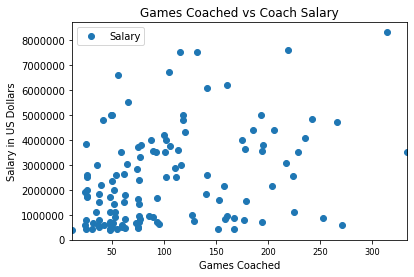

<Figure size 360x504 with 0 Axes>

In [701]:
#See if there is a visible link between Games and Salary for coaches
coachesAgg.plot(x='Games', y='Salary', style='o') 
plt.title('Games Coached vs Coach Salary') 
plt.xlabel('Games Coached') 
plt.ylabel('Salary in US Dollars')
plt.figure(figsize=(5,7))
plt.show()

Text(0.5, 1.0, 'Avg Wins per Year vs Coach Salary')

Text(0.5, 0, 'Avg Wins per Year')

Text(0, 0.5, 'Salary in US Dollars')

<Figure size 360x504 with 0 Axes>

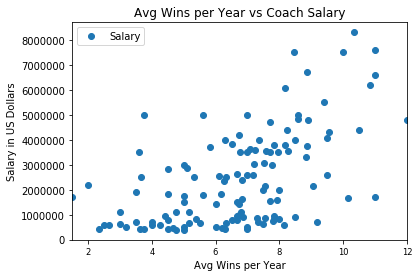

<Figure size 360x504 with 0 Axes>

In [702]:
#See if there is a visible link between Wins Per Years Coached and Salary for coaches
coachesAgg.plot(x='WinsPerYear', y='Salary', style='o') 
plt.title('Avg Wins per Year vs Coach Salary') 
plt.xlabel('Avg Wins per Year') 
plt.ylabel('Salary in US Dollars')
plt.figure(figsize=(5,7))
plt.show()

Text(0.5, 1.0, 'Stadium Capacity vs Coach Salary')

Text(0.5, 0, 'Stadium Capacity')

Text(0, 0.5, 'Salary in US Dollars')

<Figure size 360x504 with 0 Axes>

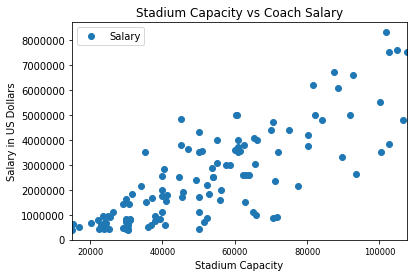

<Figure size 360x504 with 0 Axes>

In [703]:
#See if there is a visible link between Stadium Capacity and Salary for coaches
coachesAgg.plot(x='StadiumCapacity', y='Salary', style='o') 
plt.title('Stadium Capacity vs Coach Salary') 
plt.xlabel('Stadium Capacity') 
plt.ylabel('Salary in US Dollars')
plt.figure(figsize=(5,7))
plt.show()

Text(0.5, 1.0, 'Conference vs Coach Salary')

Text(0.5, 0, 'Salary in US Dollars')

Text(0, 0.5, 'Conference')

<Figure size 360x504 with 0 Axes>

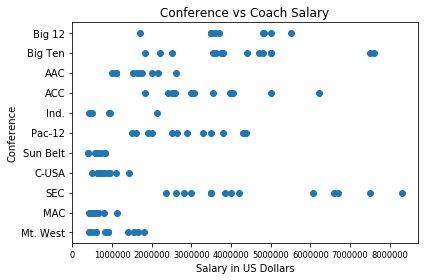

<Figure size 360x504 with 0 Axes>

In [704]:
#See if there is a visible link between Conference and Salary for coaches
plt.scatter(x=coachesAgg['Salary'], y=coachesAgg['Conference']) 
plt.title('Conference vs Coach Salary') 
plt.xlabel('Salary in US Dollars')
plt.ylabel('Conference') 
plt.tight_layout()
plt.figure(figsize=(5,7))
plt.show()

In [705]:
#Basic Linear regression model
from sklearn.linear_model import LinearRegression
x = coachesAgg[['StadiumCapacity','StadiumAge','2012GradSuccessRate'
                ,'Games', 'Wins','BowlGames','BowlWins','PointsPerGame'
                ,'PointsPerGameAllowed','2019Games','AAC','ACC','Big12'
                ,'BigTen','CUSA','Ind','MAC','MtnWest','Pac12','SEC','SunBelt']]
y = coachesAgg['Salary']
SalaryModel = LinearRegression()
SalaryModel.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [706]:
#See basic stats values
r_sq=SalaryModel.score(x,y)
print('r_sq:',r_sq)
print('intercept:',SalaryModel.intercept_)
print('Coefficients:', SalaryModel.coef_)

r_sq: 0.8594563054400856
intercept: 1906834.1897909003
Coefficients: [ 2.23947572e+01 -5.19299255e+02 -6.23452080e+03 -1.66568429e+04
  3.61285502e+04 -4.74454989e+04  8.55057196e+03  2.07852736e+04
 -1.77201320e+03 -7.58821272e+04 -3.90857515e+05  7.74113198e+05
  1.08253076e+06  1.37896549e+06 -9.29707675e+05 -7.40432449e+05
 -9.48774993e+05 -9.24055658e+05  1.99494823e+05  1.53358350e+06
 -1.03485948e+06]


In [707]:
#Create ML regression model with train/test
#Use sklearn to develop make train and test data from coachesAgg
from sklearn.model_selection import train_test_split 
X = coachesAgg[['StadiumCapacity','StadiumAge','2012GradSuccessRate'
                ,'Games', 'Wins','BowlGames','BowlWins','PointsPerGame'
                ,'PointsPerGameAllowed','2019Games']]
y = coachesAgg['Salary']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)


In [708]:
#Train the model using 80% of coachesAgg data
from sklearn.linear_model import LinearRegression
SalaryModel = LinearRegression()
SalaryModel.fit(X_train, y_train)
Salary_Predicted=SalaryModel.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [709]:
#See coefficients of SalaryModel
print('Coefficients: \n', SalaryModel.coef_)

Coefficients: 
 [ 5.12643964e+01  3.61557092e+03  6.93091374e+01 -9.58038405e+03
  1.01718231e+04  2.74863997e+04  1.90733703e+05  4.79292412e+03
  7.99137586e+03 -1.43365632e+05]


In [710]:
#See r squared of Salary
from sklearn.metrics import r2_score
print('R squared: ',
     r2_score(y_test,Salary_Predicted))

R squared:  0.7320086368302925


Text(0.5, 1.0, 'Actual Coach Salary vs Predicted Coach Salary')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

<Figure size 360x504 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

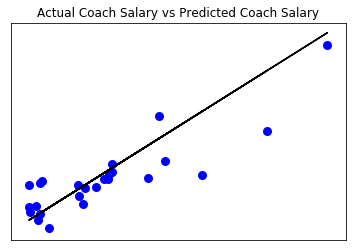

<Figure size 360x504 with 0 Axes>

In [711]:
#Plot Salary results
plt.plot(y_test,y_test, color='black')
plt.scatter(y_test,Salary_Predicted, color='blue',linewidth=3)

plt.title('Actual Coach Salary vs Predicted Coach Salary') 
plt.xticks(())
plt.yticks(())
plt.figure(figsize=(5,7))
plt.show